# REF3: CSE575- Project 2: K Means Clustering

STUDENT: Francis Mendoza

ASUID: 1213055998

EMAIL: fmendoz7@asu.edu

---------------------------------------------------------------------------------------------
#### STRATEGY 1: Randomly picking initial centers


#### STRATEGY 2: First Center Random, Then Maximum Equidistance

#### IMPORTANT POINTS
    1. Clusters need to work from 2-10
    2. Plot Objective Function value vs. Number Of Clusters, k
    3. Plot Objective Function TWICE under EACH STRATEGY (each start under different 
    initialization,  to smooth out any discrepancies from the first run)

In [9]:
import scipy.io
import numpy as np
import matplotlib.pyplot as plt, mpld3
from matplotlib import style
import pandas as pd 

style.use('ggplot')

In [6]:
Numpyfile = scipy.io.loadmat('AllSamples.mat')

# Return as numpy array
coordinatesArr = Numpyfile['AllSamples']
coordinatesArr

array([[ 2.05924902,  7.20598798],
       [ 8.87578072,  8.96092361],
       [ 8.00706441,  2.77531997],
       [ 5.01728788,  3.76311975],
       [ 6.39056222,  5.17956451],
       [ 1.95480368,  7.78421782],
       [ 4.80754093,  3.03464954],
       [ 1.3483716 ,  3.96379638],
       [ 3.04101702, -0.36138487],
       [ 8.61947945,  2.98598319],
       [ 6.11106851,  6.23497555],
       [ 3.84278989,  5.53546695],
       [ 1.69565649,  7.68082458],
       [ 4.05095774,  4.05212767],
       [ 2.48989693,  8.40047863],
       [ 6.6384501 ,  8.33574252],
       [ 6.6781262 ,  1.1080157 ],
       [ 6.2396717 ,  6.55049457],
       [ 4.72935154,  3.80839045],
       [ 3.81135136,  5.98125361],
       [ 4.90270653,  3.48642863],
       [ 7.59763505,  7.93924   ],
       [ 7.59731342,  1.16504743],
       [ 2.07898569,  7.16739313],
       [ 7.30246332,  3.16580577],
       [ 6.63352332,  0.98020705],
       [ 3.06996954,  5.97020551],
       [ 4.34489155,  3.99726667],
       [ 3.02105687,

In [13]:
class K_Means:
    # Constructor
    def __init__(self, k =3, tolerance = 0.0001, max_iterations = 500):
        self.k = k
        self.tolerance = tolerance
        self.max_iterations = max_iterations
    
    # Distance Metric we use
    def Euclidean_distance(feat_one, feat_two):
        squared_distance = 0
        
        # Lengths of two features must be the same
        for i in range(len(feat_one)):
            squared_distance += (feat_one[i] - feat_two[i])**2
        
        ed = sqrt(squared_distance)
        return ed;
    
    # Global Boolean Values To Switch Strategy 1 and Strategy 2
    strat1Bool = False
    strat2Bool = False
    
    # (!!!) STRATEGY 1: Initialize Centroids Randomly
    def centroidInit_Strat1(self, data):
        self.centroids = {}
        
        # STEP 1: Randomize Initial Centroids
        for i in range(self.k):
            # (??) Is taking first k centroids a valid way to randomize?
            self.centroids[i] = data[i]
            
        # STEP 2: Begin Iterations
        for i in range(self.max_iterations):
            self.classes = {}
            for i in range(self.k):
                self.classes[i] = []
            
            # STEP 2: Calculate Euclidean Distance Between Point And Cluster
            for features in data:
                distances = [np.linalg.norm(features - self.centroids[centroid]) for centroid in self.centroids]
                classification = distances.index(min(distances))
                self.classes[classification].append(features)

            previous = dict(self.centroids)

            # STEP3: Recalcualte Centroids For Next Run
            for classification in self.classes:
                self.centroids[classification] = np.average(self.classes[classification], axis = 0)
                
            isOptimal = True
            
            for centroid in self.centroids:
                original_centroid = previous[centroid]
                curr = self.centroids[centroid]
                
                if np.sum((curr - original_centroid)/original_centroid * 100.00) > self.tolerance:
                    isOptimal = False
                    
            # STEP 4: Break Out Of Main Loop If Results Are Optimal
            if isOptimal == True:
                break

    def pred(self, data):
        distances = [np.linalg.norm(data - self.centroids[centroid] for centroid in self.centroids)]
        classification = distances.index(min(distances))
        return classification

In [30]:
def strategy1_execute(X, a):
    # STRATEGY 1, For Loop To Iterate from 2-10 Clusters, 2 runs for the whole thing
    for i in range(2,11):
        print("Initialization #", a)
        print("STRATEGY # 1: Clusters = ", i)
        km = K_Means(i)
        km.centroidInit_Strat1(X)
        
        # (!!!) Plotting starts here
        colors = 10*["r", "g", "c", "b", "k"]

        for centroid in km.centroids:
            plt.scatter(km.centroids[centroid][0], km.centroids[centroid][1], s = 130, marker = "x")

        for classification in km.classes:
            color = colors[classification]
            for features in km.classes[classification]:
                plt.scatter(features[0], features[1], color = color, s = 30)

        plt.show()
        print("-------------------------------------------------------------------")

Initialization # 1
STRATEGY #1: Clusters =  2


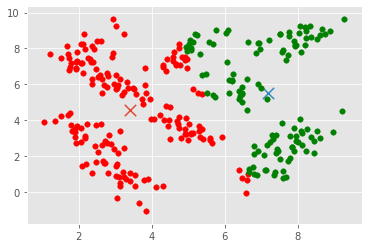

-------------------------------------------------------------------
Initialization # 1
STRATEGY #1: Clusters =  3


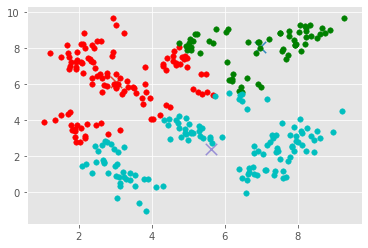

-------------------------------------------------------------------
Initialization # 1
STRATEGY #1: Clusters =  4


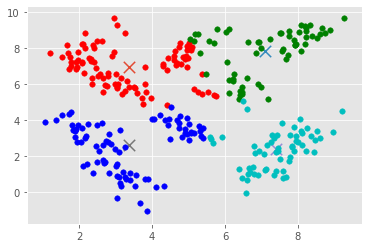

-------------------------------------------------------------------
Initialization # 1
STRATEGY #1: Clusters =  5


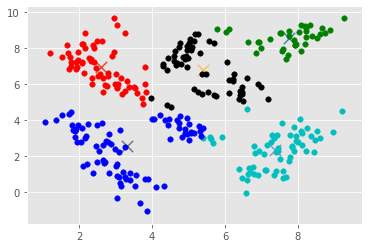

-------------------------------------------------------------------
Initialization # 1
STRATEGY #1: Clusters =  6


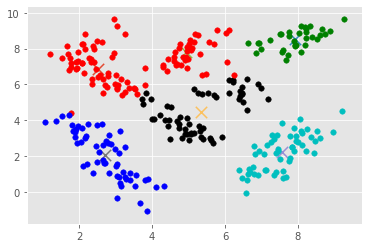

-------------------------------------------------------------------
Initialization # 1
STRATEGY #1: Clusters =  7


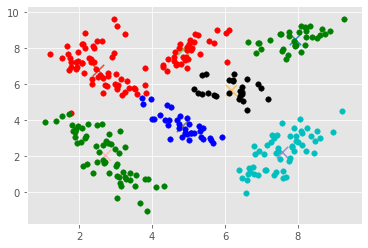

-------------------------------------------------------------------
Initialization # 1
STRATEGY #1: Clusters =  8


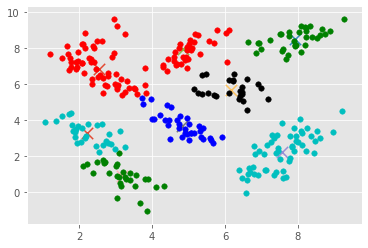

-------------------------------------------------------------------
Initialization # 1
STRATEGY #1: Clusters =  9


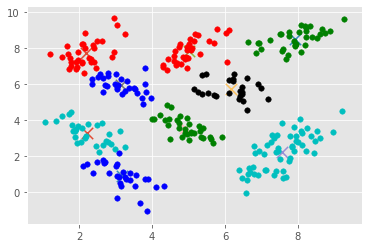

-------------------------------------------------------------------
Initialization # 1
STRATEGY #1: Clusters =  10


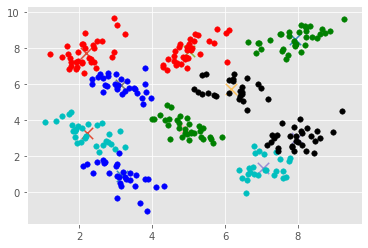

-------------------------------------------------------------------
Initialization # 2
STRATEGY #1: Clusters =  2


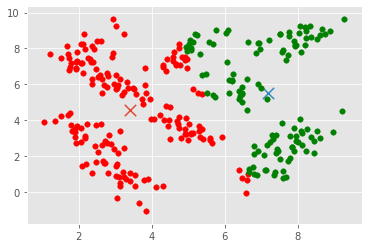

-------------------------------------------------------------------
Initialization # 2
STRATEGY #1: Clusters =  3


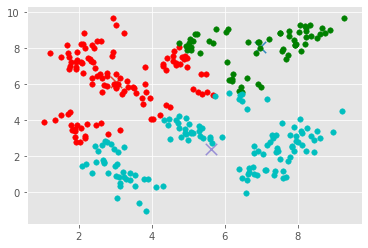

-------------------------------------------------------------------
Initialization # 2
STRATEGY #1: Clusters =  4


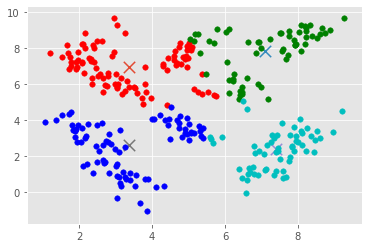

-------------------------------------------------------------------
Initialization # 2
STRATEGY #1: Clusters =  5


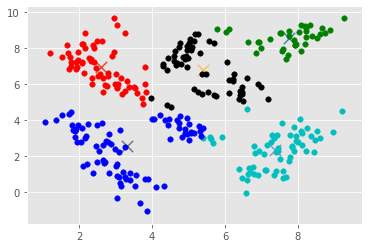

-------------------------------------------------------------------
Initialization # 2
STRATEGY #1: Clusters =  6


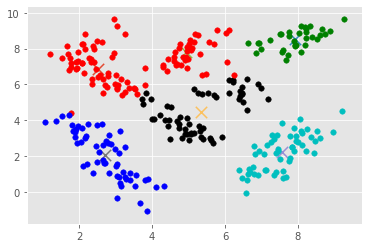

-------------------------------------------------------------------
Initialization # 2
STRATEGY #1: Clusters =  7


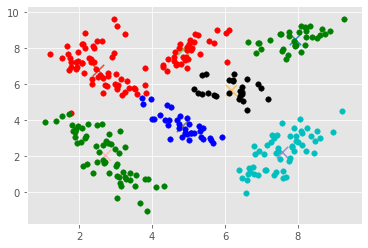

-------------------------------------------------------------------
Initialization # 2
STRATEGY #1: Clusters =  8


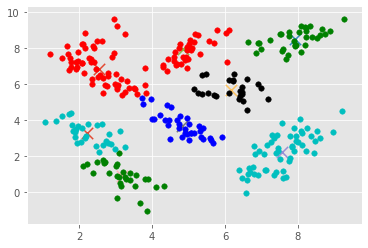

-------------------------------------------------------------------
Initialization # 2
STRATEGY #1: Clusters =  9


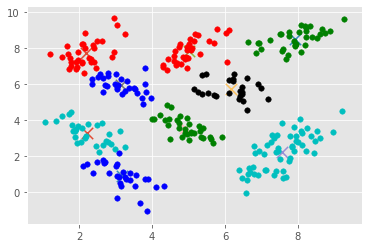

-------------------------------------------------------------------
Initialization # 2
STRATEGY #1: Clusters =  10


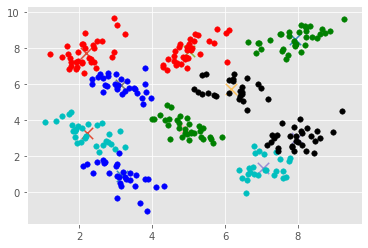

-------------------------------------------------------------------


In [32]:
def main():
    # 'Data' is coordinatesArr
    X = coordinatesArr

    # STRATEGY 1, For Loop To Iterate from 2-10 Clusters, 2 runs for the whole thing
    for a in range(1,3):
        strategy1_execute(X, a)
        print("===================================================================")
    
    # (!!!@@@) FILL: STRATEGY 2, For Loop To Iterate from 2-10 Clusters, 2 runs for the whole thing
    """<FILL IN CODE HERE>"""
    


if __name__ == "__main__":
    main()